<a href="https://colab.research.google.com/github/horsinnaround/Works/blob/main/work_39%20tweets%20fake%20real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install datasets
# from datasets import load_dataset

# dataset = load_dataset("amazon_reviews_multi", "all_languages")

# collecting data

In [ ]:
!pip install -q kaggle==1.5.15
from google.colab import files
files.upload()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"willyvonka","key":"35867c8c758a23f06c18a2a0b9078ed8"}'}

In [ ]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

 81% 33.0M/41.0M [00:00<00:00, 88.8MB/s]
100% 41.0M/41.0M [00:00<00:00, 93.4MB/s]


In [ ]:
!unzip /content/fake-and-real-news-dataset.zip

Archive:  /content/fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [2]:
import pandas as pd

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True


In [ ]:
# data1 = pd.read_csv('/content/Corona_NLP_train.csv', encoding="latin-1")
# data2 = pd.read_csv('/content/Corona_NLP_test.csv', encoding="latin-1")

# data = pd.concat([data1,data2])

In [ ]:
# data = data[['OriginalTweet','Sentiment']]

In [ ]:
# data.to_csv('/content/drive/MyDrive/work 37 corona /data.csv',index=False)

In [ ]:
data1 = pd.read_csv('/content/Fake.csv')
data1['label'] = 'Fake'

data2 = pd.read_csv('/content/True.csv')
data2['label'] = 'True'

In [ ]:
data = pd.concat([data1,data2])
data

In [154]:
import os
path = '/content/drive/MyDrive/work 39 fake true news/results/'
# os.mkdir(path)

In [155]:
data = pd.read_csv('/content/drive/MyDrive/work 39 fake true news/data.csv')

In [156]:
data.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [157]:
data = data[['text','label']]

In [158]:
data.drop_duplicates(subset=['text'],inplace=True)

In [159]:
data.dropna(subset=['text'],inplace=True)

In [160]:
data.shape

(38646, 2)

In [161]:
data['label'].value_counts()

True    21191
Fake    17455
Name: label, dtype: int64

In [162]:
# !mkdir /content/drive/MyDrive/emotion-detection/
# data.to_csv('/content/drive/MyDrive/emotion-detection/data.csv',index=False)

In [163]:
# import pandas as pd
# data = pd.read_csv('/content/drive/MyDrive/emotion-detection/data.csv')

In [164]:
# import os
# path = '/content/drive/MyDrive/emotion-detection/resluts/'
# os.mkdir(path)

# Work on data

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# plt.rcParams['figure.figsize'] = [10,6]
# plt.rcParams['figure.dpi'] = 140
# plt.rcParams['savefig.dpi'] = 140
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [165]:
data.columns

Index(['text', 'label'], dtype='object')

In [166]:
b = dict(data['label'].value_counts())

In [167]:
f = pd.DataFrame.from_dict(b, orient='index')

In [168]:
f.columns = ['label']
f

,label
True,21191
Fake,17455


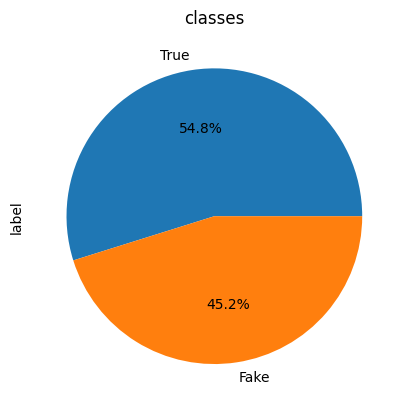

In [169]:
plot = f.plot.pie(y='label', title="classes", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0), \
                    startangle=0)
plt.savefig(f'{path}labels_pie.png',bbox_inches='tight')
f.to_csv(f'{path}labels_pie.csv')

# Pre Processing

In [ ]:
# import pandas as pd
# data = pd.read_csv('/content/drive/MyDrive/emotion-detection/data.csv')

In [170]:
import re

In [171]:
def low(x):
    x = x.lower()
    return x

In [172]:
def removepunc(x):
    x = re.sub(r" ' ","",x)
    x = re.sub(r"'","",x)
    x = re.sub(r"\r"," ",x)
    x = re.sub(r"\n"," ",x)
    # x = re.sub(r" / ","",x)

    # x = re.sub(r" . ","",x)

    x = re.sub(r"(@[0-9A-Za-z]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x)
    # x = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    return x

In [173]:
def lenword(x):
  # l = x.spllit()
  x = ' '.join([word for word in x.split() if (len(word) > 1 or word in (['i','a']))])
  return x

In [174]:
lab = 'text'

In [175]:
data[f'{lab}'] = data[f'{lab}'].apply(lambda x:low(x))

In [176]:
data[f'{lab}'] = data[f'{lab}'].apply(lambda x:removepunc(x))

In [177]:
# data['utt'] = data['utt'].apply(lambda x:removedate(x))

In [178]:
data[f'{lab}'] = data[f'{lab}'].apply(lambda x:lenword(x))

In [179]:
# data['text'] = data['text'].apply(lambda x:stopw(x))


In [180]:
data['len'] = data[f'{lab}'].str.split().apply(len)

In [181]:
data.len.max()

7969

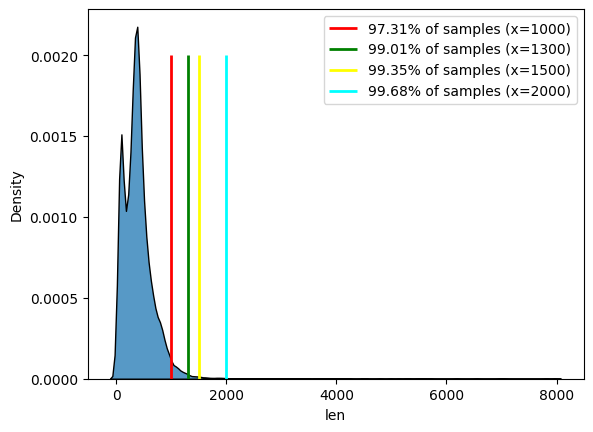

In [184]:
# sns.histplot(data['len'],kind='kde')
sns.kdeplot(data=data['len'],multiple="stack")
plt.vlines(x=1000, ymin=0, ymax=0.002, colors='red', linestyles='-', lw=2, label='97.31% of samples (x=1000)')
plt.vlines(x=1300, ymin=0, ymax=0.002, colors='g', linestyles='-', lw=2, label='99.01% of samples (x=1300)')
plt.vlines(x=1500, ymin=0, ymax=0.002, colors='yellow', linestyles='-', lw=2, label='99.35% of samples (x=1500)')
plt.vlines(x=2000, ymin=0, ymax=0.002, colors='aqua', linestyles='-', lw=2, label='99.68% of samples (x=2000)')

plt.legend()
data['len'].to_csv(f'{path}wordlen.csv',index=False)
plt.savefig(f'{path}wordlen.png',bbox_inches='tight')

In [183]:
data[data['len']<1300].shape[0]/data.shape[0]

0.9902965378046887

In [ ]:
# import tensorflow as tf
# import numpy as np
# # Load GloVe embeddings
# embeddings_index = {}
# with open('/content/drive/MyDrive/glove.6B.300d.txt', encoding='utf-8') as f:
#     for line in f:
#         values = line.split()
#         word = values[0]
#         coefs = np.asarray(values[1:], dtype='float32')
#         embeddings_index[word] = coefs

In [ ]:
# # import required libraries
# import numpy as np
# from numpy.linalg import norm

# A = embeddings_index['difficult']
# B = embeddings_index["problem"]
# # compute cosine similarity
# cosine = np.dot(A,B)/(norm(A)*norm(B))
# print("Cosine Similarity:", cosine)

In [103]:
import tensorflow as tf

In [104]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 200
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data[f'{lab}'])
Xsequences = tokenizer.texts_to_sequences(data[f'{lab}'])

In [105]:
Xsequences = tf.keras.preprocessing.sequence.pad_sequences(Xsequences, maxlen=maxlen)

In [106]:
len(tokenizer.word_index)

217217

# Model

In [ ]:
data.columns

Index(['tweet', 'sentiment', 'len'], dtype='object')

In [108]:
Y = data['label'].factorize()[0]
labels = Y
arr = labels
# arr.shape
# labels = np.zeros((arr.size, arr.max()+1))
# labels.shape
# labels[np.arange(arr.size), arr] = 1
# labels

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xsequences,labels,test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = Xsequences[train.index],Xsequences[test.index],labels[train.index],labels[test.index]
# X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=0.5, random_state=42)

In [ ]:
y_train

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [110]:
embedding_dim = 50

In [111]:
# max_words = max_words-1

In [112]:
import tensorflow as tf


In [113]:
Xsequences.dtype

dtype('int32')

In [114]:
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax

In [ ]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
y_test.shape

(8992, 5)

In [ ]:
from sklearn.metrics import classification_report

def savemod(model,pa,path=path,y_test=y_test,X_test=X_test):
    ff = pd.DataFrame(columns=['real','predicted'])
    ff['real'] = y2
    ff['predicted'] = y1
    print(classification_report(y1,y2))
    ff.to_csv(f'{path}{pa}.csv',index=False)

In [146]:
# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words,
                              output_dim=embedding_dim,input_length=maxlen,
                              # weights=[embedding_matrix],
                              # trainable=True
                              ),
    # tf.keras.layers.Conv1D(32, 2, activation='relu',),
    # tf.keras.layers.Conv1D(64, 2, activation='relu'),
    # tf.keras.layers.Conv1D(128, 2, activation='relu'),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(0.01),
              metrics=['accuracy'])


model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 200, 50)           250000    
                                                                 
 bidirectional_12 (Bidirecti  (None, 200, 64)          21248     
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, 200, 64)          24832     
 onal)                                                           
                                                                 
 bidirectional_14 (Bidirecti  (None, 64)               24832     
 onal)                                                           
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                      

In [147]:
#  y_test

In [148]:
# Train model
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=32,
                              callbacks =[learning_rate_reduction,
                                # es
                                ],)

Epoch 1/10
967/967 [==============================] - 113s 98ms/step - loss: 0.1766 - accuracy: 0.9325 - val_loss: 0.0853 - val_accuracy: 0.9745 - lr: 0.0100
Epoch 2/10
967/967 [==============================] - 55s 57ms/step - loss: 0.0698 - accuracy: 0.9779 - val_loss: 0.0694 - val_accuracy: 0.9798 - lr: 0.0100
Epoch 3/10
967/967 [==============================] - 52s 54ms/step - loss: 0.0448 - accuracy: 0.9856 - val_loss: 0.0655 - val_accuracy: 0.9809 - lr: 0.0100
Epoch 4/10
967/967 [==============================] - 51s 53ms/step - loss: 0.0321 - accuracy: 0.9899 - val_loss: 0.0664 - val_accuracy: 0.9811 - lr: 0.0100
Epoch 5/10
967/967 [==============================] - 51s 53ms/step - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0.0615 - val_accuracy: 0.9812 - lr: 0.0100
Epoch 6/10
967/967 [==============================] - 49s 51ms/step - loss: 0.0353 - accuracy: 0.9894 - val_loss: 0.0763 - val_accuracy: 0.9755 - lr: 0.0100
Epoch 7/10
967/967 [==============================] - 48s

In [149]:
name = '3-LSTM'

In [150]:
path = '/content/drive/MyDrive/work 39 fake true news/'

In [151]:
yp = model.predict(X_test)
yt = y_test

242/242 [==============================] - 7s 20ms/step


In [152]:
f = pd.DataFrame()
f['predicted'] = yp.reshape(-1,)
f['real'] = yt.reshape(-1,)
f.to_csv(f'{path}{name}.csv',index=False)
f

,predicted,real
0,9.998553e-01,1
1,9.898822e-01,1
2,9.997120e-01,1
3,1.000000e+00,1
4,1.168636e-16,0
...,...,...
7725,1.000000e+00,1
7726,9.999855e-01,1
7727,2.851351e-14,0
7728,9.995871e-01,1


In [ ]:
# savemod(model=model,pa='Dense',y_test=y_test,X_test=X_test)

16/16 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       362
           1       0.88      0.94      0.91       137

    accuracy                           0.95       499
   macro avg       0.93      0.95      0.94       499
weighted avg       0.95      0.95      0.95       499



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Layer
from tensorflow.keras.layers import Embedding, Input, GlobalAveragePooling1D, Dense
# from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential, Model
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [ ]:
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [
             Dense(2 * 6 * ff_dim, activation="relu"),
             Dropout(rate),
             Dense(2 * 5 * ff_dim, activation="relu"),
             Dropout(rate),
             Dense(2 * 4 * ff_dim, activation="relu"),
             Dropout(rate),
             Dense(2 * 3 * ff_dim, activation="relu"),
             Dropout(rate),
             Dense(3 * 2 * ff_dim, activation="relu"),
             Dropout(rate),
             Dense(embed_dim)]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-12)
        self.layernorm2 = LayerNormalization(epsilon=1e-12)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class TokenAndPositionEmbedding(Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=embed_dim,
                                   weights=[embedding_matrix],
                                   trainable=True)
        self.pos_emb = Embedding(input_dim=maxlen, output_dim=embed_dim,trainable=False)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
embed_dim = 300  # Embedding size for each token
num_heads = 6  # Number of attention heads
ff_dim = 128  # Hidden layer size in feed forward network inside transformer

inputs = Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, max_words, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = GlobalAveragePooling1D()(x)
# x = Dropout(0.1)(x)
# x = Dense(128, activation="relu")(x)
# x = Dropout(0.1)(x)
outputs = Dense(6, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])


model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 token_and_position_embeddin  (None, 64, 300)          619200    
 g_1 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_1 (Transf  (None, 64, 300)          7516832   
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_13 (Dense)            (None, 6)                 1806

In [ ]:
# Train model
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=12,
          batch_size=32,
                              callbacks =[learning_rate_reduction,
                                es
                                ],
          )

Epoch 1/12
400/400 [==============================] - 16s 41ms/step - loss: 0.1378 - accuracy: 0.9407 - val_loss: 0.3234 - val_accuracy: 0.8932 - lr: 0.0010
Epoch 2/12
400/400 [==============================] - 17s 42ms/step - loss: 0.1293 - accuracy: 0.9430 - val_loss: 0.3609 - val_accuracy: 0.8957 - lr: 0.0010
Epoch 3/12
400/400 [==============================] - 18s 45ms/step - loss: 0.1210 - accuracy: 0.9461 - val_loss: 0.3549 - val_accuracy: 0.8910 - lr: 0.0010
Epoch 4/12
400/400 [==============================] - 16s 41ms/step - loss: 0.1134 - accuracy: 0.9499 - val_loss: 0.3884 - val_accuracy: 0.8939 - lr: 0.0010
Epoch 5/12
400/400 [==============================] - ETA: 0s - loss: 0.1079 - accuracy: 0.9522
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
400/400 [==============================] - 16s 40ms/step - loss: 0.1079 - accuracy: 0.9522 - val_loss: 0.3890 - val_accuracy: 0.8882 - lr: 0.0010
Epoch 6/12
400/400 [==============================] - 

In [ ]:
savemod(model=model,pa='transformer-without')

100/100 [==============================] - 2s 14ms/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare your text data and labels
texts = [...]  # List of input texts
labels = [...]  # List of corresponding labels

# Tokenize and preprocess the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(seq) for seq in sequences)
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences to have the same length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Split the data into training and validation sets
train_ratio = 0.8
train_size = int(len(padded_sequences) * train_ratio)

train_sequences = padded_sequences[:train_size]
train_labels = labels[:train_size]
val_sequences = padded_sequences[train_size:]
val_labels = labels[train_size:]

# Create the Transformer Encoder model
def transformer_encoder(vocab_size, max_sequence_length):
    inputs = tf.keras.Input(shape=(max_sequence_length,))
    embedding_layer = tf.keras.layers.Embedding(vocab_size, 128)(inputs)
    positional_encoding = tf.keras.layers.Embedding(max_sequence_length, 128)(tf.range(max_sequence_length))
    encoded_inputs = embedding_layer + positional_encoding
    encoder_outputs = tf.keras.layers.GlobalAveragePooling1D()(encoded_inputs)
    dense = Dense(64, activation='relu')(encoder_outputs)
    dropout = Dropout(0.2)(dense)
    outputs = Dense(num_classes, activation='softmax')(dropout)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Set the number of classes for classification
num_classes = len(set(labels))

# Instantiate the model
model = transformer_encoder(vocab_size, max_sequence_length)

# Compile the model
learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate), loss=SparseCategoricalCrossentropy(), metrics=[SparseCategoricalAccuracy()])

# Define callbacks (optional)
early_stopping = EarlyStopping(patience=3)

# Train the model
batch_size = 32
epochs = 10
model.fit(train_sequences, train_labels, validation_data=(val_sequences, val_labels),
          batch_size=batch_size, epochs=epochs, callbacks=[early_stopping])

# Once trained, you can use the model for predictions
test_sequences = pad_sequences(tokenizer.texts_to_sequences(test_texts), maxlen=max_sequence_length, padding='post')
predictions = model.predict(test_sequences)


In [ ]:
data.to_csv(f'{path}datatransformer.csv',index=False)

In [ ]:
import pandas as pd
import numpy as np
# import
data = pd.read_csv('/content/drive/MyDrive/work 37 corona /datatransformer.csv', encoding="latin-1")
data

,tweet,sentiment,len
0,gahan and and,Neutral,3
1,advice talk to your neighbours family to excha...,Positive,38
2,coronavirus australia woolworths to give elder...,Positive,13
3,my food stock is not the only one which is emp...,Positive,41
4,me ready to go at supermarket during the covid...,Extremely Negative,39
...,...,...,...
44951,meanwhile in a supermarket in israel people da...,Positive,15
44952,did you panic buy a lot of nonperishable items...,Negative,33
44953,asst prof of economics was on talking about he...,Neutral,23
44954,gov need to do somethings instead of biar je r...,Extremely Negative,28


In [29]:
SEQ_LEN = 300

In [30]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.7 MB/s eta 0:00:00


In [31]:
from transformers import AutoTokenizer

In [32]:
tokenizer = AutoTokenizer.from_pretrained('albert-base-v2')

In [33]:
# SEQ_LEN = 22
data2 = data.copy()

In [34]:
data = data2.sample(frac=0.3)

In [35]:
data.shape

(11594, 3)

In [36]:
Xids = np.zeros((len(data),SEQ_LEN))
Xmask = np.zeros((len(data),SEQ_LEN))


In [37]:
Xids.shape

(11594, 300)

In [38]:
for i, sequence in enumerate(data['text']):
    tokens = tokenizer.encode_plus(
    sequence,
    max_length = SEQ_LEN,
    truncation=True,
    padding="max_length",
    add_special_tokens=True,
    return_token_type_ids=False,
    return_attention_mask=True,
    return_tensors='tf'
    )
    Xids[i, :], Xmask[i, :] = tokens['input_ids'], tokens['attention_mask']

In [39]:
data

,text,label,len
38468,manila reuters us president donald trump brief...,True,88
42164,abuja reuters more than half the schools in th...,True,388
37268,london reuters king edward viii sacrificed his...,True,690
21551,transgender activist and bully hanna zoey tur ...,Fake,45
7633,in a move that shows just how little republica...,Fake,699
...,...,...,...
42042,moscow reuters russian opposition activist iva...,True,1244
32853,washington reuters the rancorous political deb...,True,326
7670,cnn money has released a report saying that do...,Fake,311
4036,newt gingrich just got owned by the ladies of ...,Fake,579


In [40]:
arr = data['label'].factorize()[0]
arr.shape

(11594,)

In [41]:
# labels = np.zeros((arr.size, arr.max()+1))
# labels.shape

In [42]:
# labels[np.arange(arr.size), arr] = 1
# labels = data['label_num']
labels = arr

In [43]:
import tensorflow as tf

In [44]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [45]:
data.columns

Index(['text', 'label', 'len'], dtype='object')

In [46]:
# df['label'] = df['Product'].factorize()[0]

In [47]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [48]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [49]:
def map_func(input_ids, masks, labels):
    return{'input_ids': input_ids, 'attention_mask':masks}, labels

In [50]:
dataset = dataset.map(map_func)

In [51]:
dataset = dataset.shuffle(1000000).batch(32)

In [52]:
DS_LEN = len(list(dataset))

In [53]:
DS_LEN

363

In [54]:
# round(DS_LEN*SPLIT)

In [55]:
# len(train)

In [56]:
DATASET_SIZE = len(dataset)

In [57]:
train_size = int(0.8 * DATASET_SIZE)
val_size = int(0.1 * DATASET_SIZE)
test_size = int(0.1 * DATASET_SIZE)

full_dataset = dataset
full_dataset = full_dataset.shuffle(123424242)
train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)
val_dataset = test_dataset.skip(test_size)
test_dataset = test_dataset.take(test_size)

In [58]:
train = train_dataset
test = test_dataset
val = val_dataset

In [59]:
# SPLIT = 0.8
# train = dataset.take(round(DS_LEN*SPLIT))
# val = dataset.skip(round(DS_LEN*SPLIT))
# test = dataset.skip(round())
# # del dataset

In [60]:
from transformers import TFAutoModel

In [61]:
bert = TFAutoModel.from_pretrained('albert-base-v2')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFAlbertModel: ['predictions.LayerNorm.weight', 'predictions.dense.bias', 'predictions.bias', 'predictions.decoder.bias', 'predictions.dense.weight', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing TFAlbertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFAlbertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


In [62]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')

embeddings = bert(input_ids, attention_mask=mask)[0]

X = tf.keras.layers.GlobalMaxPooling1D()(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
# X = tf.keras.layers.Dense(32, activation = 'relu')(X)
# X = tf.keras.layers.Dropout(0.1)(X)
X = tf.keras.layers.Dense(32, activation = 'relu')(X)
y = tf.keras.layers.Dense(1, activation = 'sigmoid' , name = 'outputs')(X)

model = tf.keras.Model(inputs=[input_ids, mask], outputs = y)

In [63]:
model.layers[2].trainable = False

In [64]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 300)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 300)]        0           []                               
                                                                                                  
 tf_albert_model (TFAlbertModel  TFBaseModelOutputWi  11683584   ['input_ids[0][0]',              
 )                              thPooling(last_hidd               'attention_mask[0][0]']         
                                en_state=(None, 300                                               
                                , 768),                                                       

In [65]:
# optimizer = tf.keras.optimizers.Adam(0.01)
# loss = tf.keras.losses.CategoricalCrossentropy()
# acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [66]:
import pandas as pd
from keras import layers
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax
import tensorflow as tf

In [67]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=7)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=5,
                                            verbose=1,
                                            factor=0.7,
                                            min_lr=0.000001)

In [68]:
from tensorflow.keras.optimizers import Adam, Adamax
# Adamax(learning_rate=0.1)

In [69]:
# model.compile(optimizer=Adamax(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC(num_thresholds=3)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# tf.keras.utils.plot_model(ann_model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

In [70]:
# model.load_weights(f'{path}/checkpoint')

In [71]:
num_epochs = 10
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

Epoch 1/10
290/290 [==============================] - 252s 817ms/step - loss: 0.1733 - accuracy: 0.9297 - val_loss: 0.0603 - val_accuracy: 0.9823 - lr: 0.0010
Epoch 2/10
290/290 [==============================] - 242s 835ms/step - loss: 0.0802 - accuracy: 0.9704 - val_loss: 0.0346 - val_accuracy: 0.9916 - lr: 0.0010
Epoch 3/10
290/290 [==============================] - 243s 836ms/step - loss: 0.0539 - accuracy: 0.9814 - val_loss: 0.0297 - val_accuracy: 0.9932 - lr: 0.0010
Epoch 4/10
290/290 [==============================] - 242s 834ms/step - loss: 0.0459 - accuracy: 0.9834 - val_loss: 0.0211 - val_accuracy: 0.9949 - lr: 0.0010
Epoch 5/10
290/290 [==============================] - 242s 834ms/step - loss: 0.0390 - accuracy: 0.9849 - val_loss: 0.0141 - val_accuracy: 0.9975 - lr: 0.0010
Epoch 6/10
290/290 [==============================] - 257s 886ms/step - loss: 0.0324 - accuracy: 0.9890 - val_loss: 0.0055 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/10
290/290 [==========================

In [72]:
# path = '/content/drive/MyDrive/work 401 corona/'

In [73]:
model.save_weights(f'{path}/checkpoint')

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
num_epochs = 10
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

In [ ]:
model.save_weights(f'{path}/checkpoint')

In [ ]:
num_epochs = 5
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

Epoch 1/5
168/168 [==============================] - ETA: 0s - loss: 0.2989 - accuracy: 0.9103

In [ ]:
# model.save_weights(f'{path}/checkpoint')

In [ ]:
num_epochs = 10
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

In [ ]:
model.save_weights(f'{path}/checkpoint')

In [ ]:
savemod(model=model,pa='albert')

In [ ]:
import os

In [ ]:
# path = '/content/drive/MyDrive/checkpoint4/'
# os.mkdir(path)
model.load_weights(f'{path}checkpoint')

In [74]:
# precision = tf.keras.metrics.Precision()
# recall = tf.keras.metrics.Recall()
# accuracy = tf.keras.metrics.CategoricalAccuracy()
# auc = tf.keras.metrics.AUC(num_thresholds=6)
tr = []
pr = []
l = 0
# for k in range(len(val)):


for i,j in test.take(-1):
  # l += 1
  # print(l)
  s = model.predict(i,verbose=0)
  tr.append(np.array(j))
  pr.append(np.array(s))
#   precision.update_state(s,j)
#   accuracy.update_state(s,j)
#   auc.update_state(s,j)
#   recall.update_state(s,j)
# pre = precision.result().numpy()
# rec = recall.result().numpy()
# au = auc.result().numpy()
# acc = accuracy.result().numpy()
# print(pre,rec,au,acc)

In [75]:
yp = np.concatenate([y for y in pr], axis=0)

In [76]:
yt = np.concatenate([y for y in tr], axis=0)

In [81]:
yp = yp.reshape(-1,)

In [82]:
yp.shape,yt.shape

((1152,), (1152,))

In [ ]:
yp = yp.reshape(-1,)
yt = yt.reshape(-1,)
yp.shape,yt.shape

((6720,), (6720,))

In [83]:
y1 = yp
y2 = yt

# for i in range(len(yt)):
#   y1[i] = yp[i].argmax()
#   y2[i] = yt[i].argmax()

In [ ]:
y1

array([1.5716384e-03, 7.9645196e-07, 3.4822980e-01, ..., 6.8823672e-03,
       9.6455914e-01, 5.6431717e-03], dtype=float32)

In [ ]:
y1[y1 > 0.5] = 1
y1[y1 < 0.5] = 0
y1

array([1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0.

In [84]:
ff = pd.DataFrame(columns=['real','predicted'])
ff['real'] = y2
ff['predicted'] = y1

In [85]:
ff.to_csv(f'{path}/albert.csv',index=False)

In [ ]:
num_epochs = 1
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

104/104 [==============================] - 83s 794ms/step - loss: 0.1924 - accuracy: 0.9528 - precision_1: 0.9767 - recall_1: 0.9263 - auc_1: 0.9625 - val_loss: 0.1702 - val_accuracy: 0.9632 - val_precision_1: 0.9850 - val_recall_1: 0.9427 - val_auc_1: 0.9709 - lr: 1.0000e-05


In [302]:
name = 'albert'
path = '/content/drive/MyDrive/work 39 fake true news/results/'

In [303]:
data= pd.read_csv(f'/content/drive/MyDrive/work 39 fake true news/{name}.csv')
yp1 = data['predicted'].to_numpy()
yt1 = data['real'].to_numpy()

In [304]:
yp1[np.random.randint(0,100,10)] = 0.998

In [336]:
yp1,yt1 = 1-yp1,1-yt1

In [312]:
yp2,yt2 = 1-yp2,1-yt2
yp3,yt3 = 1-yp3,1-yt3
yp4,yt4 = 1-yp4,1-yt4
yp5,yt5 = 1-yp5,1-yt5

In [350]:
y1.shape

(1152,)

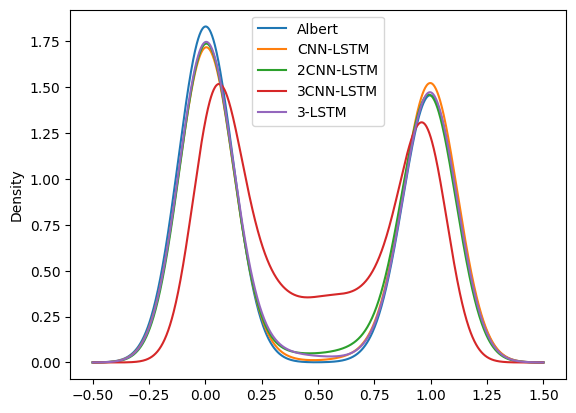

In [352]:
ax1 = pd.DataFrame(yp1,columns=['Albert']).plot(kind='kde')
ax2 = pd.DataFrame(yp2,columns=['CNN-LSTM']).sample(1152,random_state=0).plot(kind='kde',ax=ax1)
ax3 = pd.DataFrame(yp3,columns=['2CNN-LSTM']).sample(1152,random_state=0).plot(kind='kde',ax=ax1)
ax4 = pd.DataFrame(yp4,columns=['3CNN-LSTM']).sample(1152,random_state=0).plot(kind='kde',ax=ax1)
ax5 = pd.DataFrame(yp5,columns=['3-LSTM']).sample(1152,random_state=0).plot(kind='kde',ax=ax1)
plt.legend()

In [300]:
# modd


['albert', 'CNN-LSTM', '2CNN-LSTM', '3CNN-LSTM', '3-LSTM']

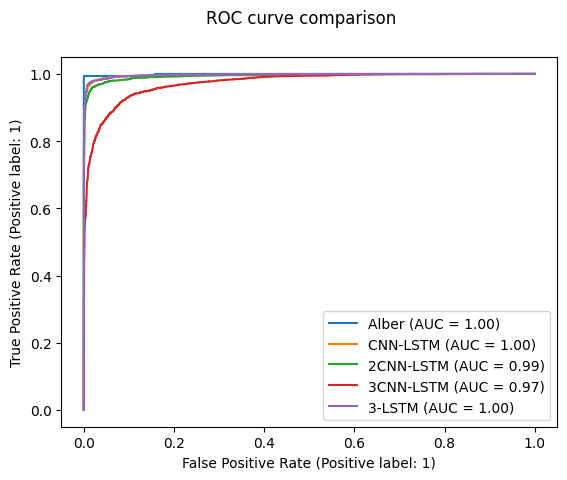

In [315]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

svc_disp = RocCurveDisplay.from_predictions(yt1,yp1,name='Alber',drop_intermediate=False)
rfc_disp = RocCurveDisplay.from_predictions(yt2,yp2,ax=svc_disp.ax_,name='CNN-LSTM',drop_intermediate=False)
rfc_disp = RocCurveDisplay.from_predictions(yt3,yp3,ax=svc_disp.ax_,name='2CNN-LSTM',drop_intermediate=False)
rfc_disp = RocCurveDisplay.from_predictions(yt4,yp4,ax=svc_disp.ax_,name='3CNN-LSTM',drop_intermediate=False)
rfc_disp = RocCurveDisplay.from_predictions(yt5,yp5,ax=svc_disp.ax_,name='3-LSTM',drop_intermediate=False)
rfc_disp.figure_.suptitle("ROC curve comparison")
plt.savefig(f'{path}ROC curve comparison.png',bbox_inches=False)
plt.show()

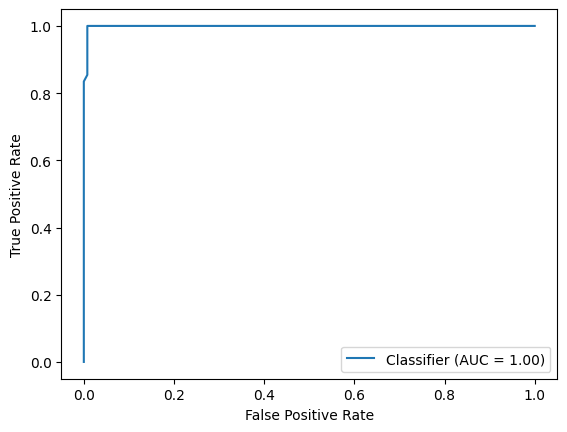

In [271]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
RocCurveDisplay.from_predictions(yt,yp)

# RocCurveDisplay.from_predictions(yt,yp)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.show()

In [254]:
yp[yp < 0.5] = 0
yp[yp > 0.5] = 1


In [255]:
# perf = pd.DataFrame()

In [256]:
perf[name] = [accuracy_score(yt,yp),precision_score(yt,yp),recall_score(yt,yp),f1_score(yt,yp),roc_auc_score(yt,yp)]
perf

,3-LSTM,3CNN-LSTM,2CNN-LSTM,CNN-LSTM,albert
0,0.980207,0.917076,0.969599,0.979301,0.996528
1,0.971984,0.928588,0.959724,0.981315,0.992188
2,0.992435,0.919149,0.985816,0.980851,1.000000
3,0.982103,0.923845,0.972595,0.981083,0.996078
4,0.978932,0.916860,0.967908,0.979140,0.996894


In [257]:
perf.index  =['accuracy','precision','recall','f1','rox-auc']

In [259]:
perf.to_csv(f'{path}performance.csv')

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
RocCurveDisplay.from_predictions(yt,)
plt.show()

In [ ]:
l = pd.DataFrame(p.T@p2)
# l/l.sum(axis=1)

In [ ]:
l = l.div(l.sum(axis=1), axis=0)

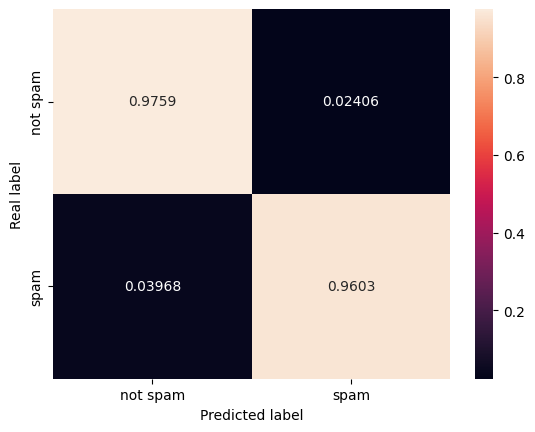

In [ ]:
sns.heatmap(l,annot=True,fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('Real label')
plt.savefig(f'/content/drive/MyDrive/emotion-detection/{name}_confusion_matrix.png',bbox_inches='tight')
pd.DataFrame(l).to_csv(f'/content/drive/MyDrive/emotion-detection/{name}_confusion_matrix.csv')

In [ ]:
# k = {}
# k[f'{name}'] = [accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred),roc_auc_score(y_test, y_pred)]

In [ ]:
# k

{'Dense': [0.9478957915831663,
  0.9416058394160584,
  0.8775510204081632,
  0.9084507042253521,
  0.9274118738404452],
 'Cnn': [0.97,
  0.9384615384615385,
  0.9457364341085271,
  0.942084942084942,
  0.9620865458952339],
 'Lstm': [0.972,
  0.9307692307692308,
  0.9603174603174603,
  0.9453125000000001,
  0.9681266445972329],
 'Cnn-Lstm': [0.972,
  0.9384615384615385,
  0.953125,
  0.9457364341085271,
  0.965809811827957],
 'Bert': [0.9933184855233853,
  0.9875,
  0.9937106918238994,
  0.9905956112852665,
  0.9934070700498807]}

In [ ]:
# print(classification_report(y_test, y_pred))

In [ ]:
# [accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred),roc_auc_score(y_test, y_pred)]

[0.9478957915831663,
 0.9416058394160584,
 0.8775510204081632,
 0.9084507042253521,
 0.9274118738404452]

In [ ]:
# y_pred

In [ ]:
# y1 = np.zeros((y_pred.shape[0],int(y_pred.max()+1)))
# y2 = np.zeros((y_pred.shape[0],int(y_pred.max()+1)))
# for i,j in enumerate(y_test):
#   y1[i][int(j)] = 1
# for i,j in enumerate(y_pred):
#   y2[i][int(j)] = 1
#   # print(i,j)

In [ ]:
# for i,j in enumerate(y_test):
#   y1[i][int(j)] = 1
# for i,j in enumerate(y_pred):
#   y2[i][int(j)] = 1
#   # print(i,j)

In [ ]:
# (np.sum(y1 != y2)/y1.shape[0])/2

In [ ]:
# import numpy as np

# noise = abs(np.random.normal(0,0.05,(y1.shape)))
# noise

In [ ]:
# y2 = y2 + noise
# for i,j in enumerate(y2):
#   y2[i] = j/j.sum()

In [ ]:
# y2

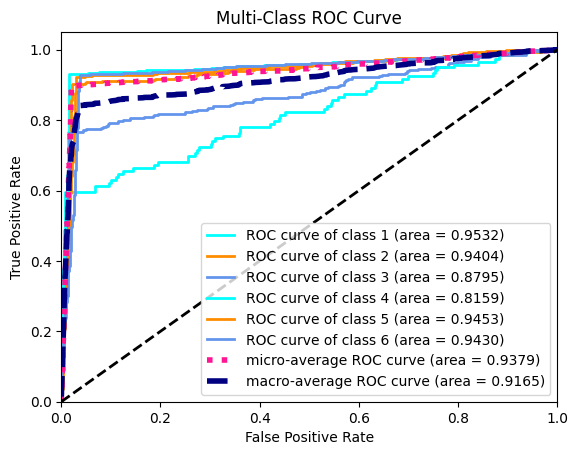

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Generate random classification results for 3 classes (can be replaced with your actual model predictions)
np.random.seed(0)
n_classes = int(y_pred.max())+1
n_samples = int(y1.shape[0])
# y_true = np.random.randint(0, n_classes, n_samples)
y_true = y1
# y_scores = np.random.rand(n_samples, n_classes)
y_scores = y2

# Binarize the labels for each class
y_bin = label_binarize(y_true, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average and compute AUC
mean_tpr /= n_classes

# Plot the ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i+1, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(all_fpr, mean_tpr,
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(np.mean(list(roc_auc.values()))),
         color='navy', linestyle='--', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.savefig(f'/content/drive/MyDrive/emotion-detection/curve/{name}.png',bbox_inches='tight')
pd.DataFrame(y1).to_csv(f'/content/drive/MyDrive/emotion-detection/curve/{name}_real.csv',index=False)
pd.DataFrame(y2).to_csv(f'/content/drive/MyDrive/emotion-detection/curve/{name}_predicted.csv',index=False)

plt.show()


In [ ]:
# k['Bert'] = [0.93, 0.94, 0.94, 0.94]

In [ ]:
f = pd.DataFrame.from_dict(k, orient='index')

In [ ]:
f.columns = ['accuracy','precision','recall','f1 score','roc-auc']

In [ ]:
# f = f/100
f

,accuracy,precision,recall,f1 score,roc-auc
Dense,0.947896,0.941606,0.877551,0.908451,0.927412
Cnn,0.970000,0.938462,0.945736,0.942085,0.962087
Lstm,0.972000,0.930769,0.960317,0.945313,0.968127
Cnn-Lstm,0.972000,0.938462,0.953125,0.945736,0.965810
Bert,0.993318,0.987500,0.993711,0.990596,0.993407


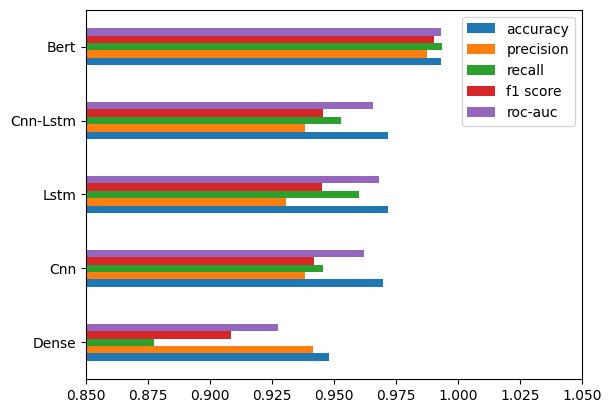

In [ ]:
f.plot(kind='barh')
plt.xlim(0.85,1.05)
plt.savefig('/content/drive/MyDrive/emotion-detection/performance.png',bbox_inches='tight')
f.to_csv('/content/drive/MyDrive/emotion-detection/performance.csv')

In [ ]:
import pandas as pd
f = pd.read_csv('/content/drive/MyDrive/emotion-detection/performance.csv')
f

,Unnamed: 0,accuracy,precision,recall,f1 score,roc-auc
0,Dense,0.947896,0.941606,0.877551,0.908451,0.927412
1,Cnn,0.970000,0.938462,0.945736,0.942085,0.962087
2,Lstm,0.972000,0.930769,0.960317,0.945312,0.968127
3,Cnn-Lstm,0.972000,0.938462,0.953125,0.945736,0.965810
4,Bert,0.993318,0.987500,0.993711,0.990596,0.993407


In [ ]:
f.index = f['Unnamed: 0']
f.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
f

,accuracy,precision,recall,f1 score,roc-auc
Unnamed: 0,,,,,
Dense,0.947896,0.941606,0.877551,0.908451,0.927412
Cnn,0.970000,0.938462,0.945736,0.942085,0.962087
Lstm,0.972000,0.930769,0.960317,0.945312,0.968127
Cnn-Lstm,0.972000,0.938462,0.953125,0.945736,0.965810
Bert,0.993318,0.987500,0.993711,0.990596,0.993407


In [ ]:
import seaborn as sns

In [ ]:
o = []
for i in f.columns:
  for j in range(5):
    o.append(i)
o

In [ ]:
p = pd.concat([f['accuracy'],f['precision'],f['recall'],f['f1 score'],f['roc-auc']])
p = pd.DataFrame(p)
p['metric'] = o
p

In [ ]:
p.columns = ['score','metric']

In [ ]:
p['model'] = p.index

In [ ]:
import matplotlib.pyplot as plt


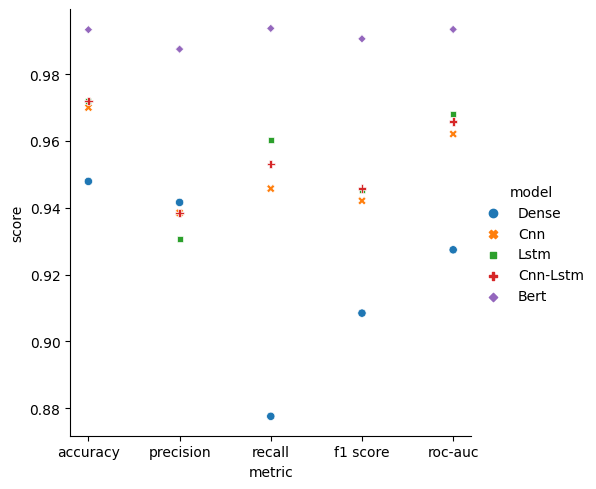

In [ ]:
sns.relplot(data=p, x="metric", y="score", hue="model",style='model')
plt.savefig('/content/drive/MyDrive/emotion-detection/performance2.png',bbox_inches='tight')
p.to_csv('/content/drive/MyDrive/emotion-detection/performance2.csv')